In [40]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings


In [8]:
raw_data = pd.read_csv('./Loan_Modelling.csv')

raw_data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In this study, Personal_Loans serves as our variable of interest. We will be matching uncovered key variables and explore how they cluster around the people that accepted the offer. Special interest will be given to customers that are already depositors, as declared by Securities_Account and CD_Account

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


No missing or null values, YAY!

In [10]:
raw_data.drop(columns=["ID","ZIPCode"]).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [11]:
# We know that we don't care about ID as a variable. However, Zip code might be convenient to determine if they can be clustered
# 
print('There are a total of :', len(raw_data['ZIPCode'].unique()), 'unique ZIP codes')

There are a total of : 467 unique ZIP codes


Given the amount of Zip Codes, this is a variable that should be removed.

There is also a wide spread in max values for variables, so for our regression models the data will need to be scaled. This will be stored in its own dataframe.

In [12]:
norm_data = raw_data.drop(columns=['ID','ZIPCode']).copy()
DOI = norm_data.copy() #DOI stands for data of interest

#Normalizing DF by max value, constraining all data between 0 and 1
for n in norm_data.columns:
    norm_data[n] = norm_data[n]/norm_data[n].abs().max()

# Univariate Analysis

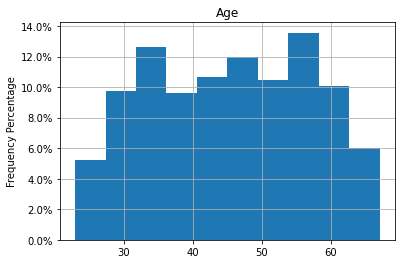

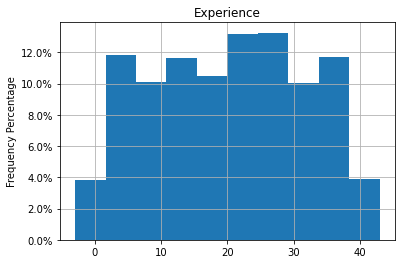

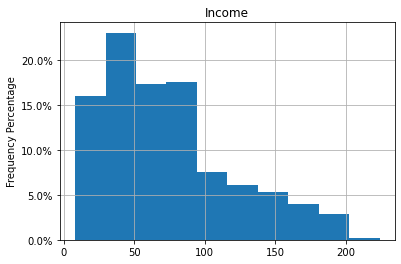

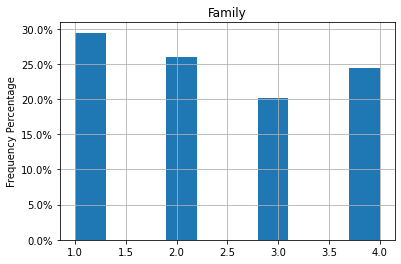

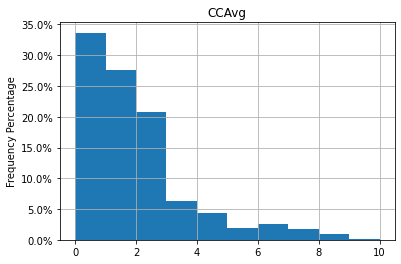

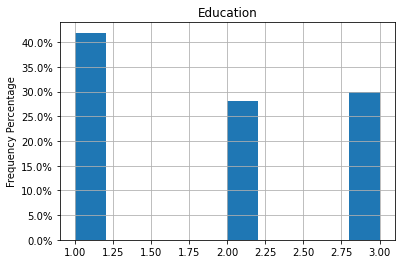

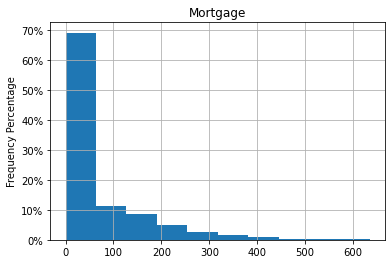

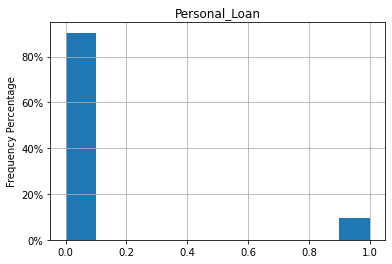

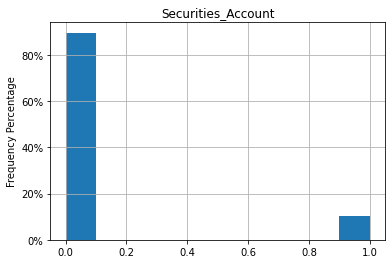

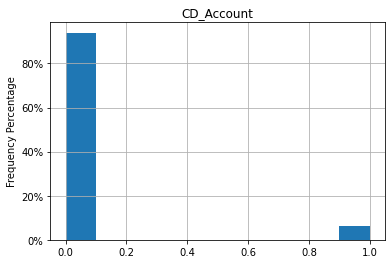

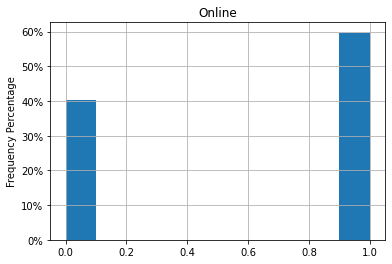

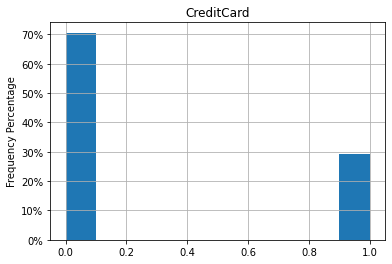

In [13]:
for x in DOI.columns:
    DOI[str(x)].hist(weights=np.ones(len(DOI[str(x)])) / len(DOI[str(x)]))
    plt.title(x)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylabel('Frequency Percentage')
    plt.show()

Just from looking at these histograms, it doesn't seem clear what are the distributions of customers for this bank. It is critical to assess what is the make up of customers and then assess the distribution of customers and determine if there is any correlation between the kind of customers and the acceptance of the previous offer.

In [42]:
# Selecting the variables that correspond to active users
# The customer based would be defined by: CCavg (non-zero values), Mortgage (non-zero values), Securities_Account (one values),
# CD_Account (one values)

pd.options.mode.chained_assignment = None

customer = DOI[['CCAvg','Mortgage','Securities_Account','CD_Account']]
customer.loc[customer['CCAvg']>0, 'CCAvg'] = 1
customer.loc[customer['Mortgage']>0, 'Mortgage'] = 1

print("The percent of zero activity customers is:")
print("{:.2f}".format(100*len(customer[(customer == 0).all(axis=1)])/len(customer)),
'%. Of those',
"{:.2f}".format(100*len(customer[((DOI[['CCAvg','Mortgage','Securities_Account','CD_Account']] == 0).all(axis=1) & DOI['Personal_Loan']==1)])/len(customer[(DOI[['CCAvg','Mortgage','Securities_Account','CD_Account']] == 0).all(axis=1)])),
'% accepted the offer')
print()

CC_customer = len(DOI[(DOI['CCAvg']!=0)])/len(DOI) # in percentage
print("The percent of credit card users is:")
print("{:.2f}".format(100*CC_customer),'%. Of those',
"{:.2f}".format(100*len(DOI[(DOI['CCAvg']!=0) & (DOI['Personal_Loan'] == 1)])/len(DOI[(DOI['CCAvg']!=0)])),
'% accepted the offer')
print()

Mortgage_customer = len(DOI[DOI['Mortgage']!=0])/len(DOI) # in percentage
print("The percent of users with mortgages is:")
print("{:.2f}".format(100*Mortgage_customer),'%. Of those',
"{:.2f}".format(100*len(DOI[(DOI['Mortgage']!=0) & (DOI['Personal_Loan'] == 1)])/len(DOI[DOI['Mortgage']!=0])),
'% accepted the offer')
print()

Savings_customer = len(DOI[DOI['Securities_Account']==1])/len(DOI) # in percentage
print("The percent of users with savings account is:")
print("{:.2f}".format(100*Savings_customer),'%. Of those',
"{:.2f}".format(100*len(DOI[(DOI['Securities_Account']==1) & (DOI['Personal_Loan'] == 1)])/len(DOI[DOI['Securities_Account']==1])),
'% accepted the offer')
print()

Checkings_customer = len(DOI['CD_Account'].loc[DOI['CD_Account']==1])/len(DOI) # in percentage
print("The percent of users with checkings account is:")
print("{:.2f}".format(100*Checkings_customer),'%. Of those',
"{:.2f}".format(100*len(DOI[(DOI['CD_Account']==1) & (DOI['Personal_Loan'] == 1)])/len(DOI[DOI['CD_Account']==1])),
'% accepted the offer')
print()



The percent of zero activity customers is:
1.38 %. Of those 1.45 % accepted the offer

The percent of credit card users is:
97.88 %. Of those 9.79 % accepted the offer

The percent of users with mortgages is:
30.76 %. Of those 10.92 % accepted the offer

The percent of users with savings account is:
10.44 %. Of those 11.49 % accepted the offer

The percent of users with checkings account is:
6.04 %. Of those 46.36 % accepted the offer



In [49]:
from itertools import chain
try:
    # since python 3.10
    from collections.abc import Iterable
except ImportError:
    from collections import Iterable
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
import math

default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

def draw_ellipse(fig, ax, x, y, w, h, a, fillcolor):
    e = patches.Ellipse(
        xy=(x, y),
        width=w,
        height=h,
        angle=a,
        color=fillcolor)
    ax.add_patch(e)


def draw_text(fig, ax, x, y, text, color=[0, 0, 0, 1], fontsize=14, ha="center", va="center"):
    ax.text(
        x, y, text,
        horizontalalignment=ha,
        verticalalignment=va,
        fontsize=fontsize,
        color="black")

def draw_annotate(fig, ax, x, y, textx, texty, text, color=[0, 0, 0, 1], arrowcolor=[0, 0, 0, 0.3]):
    plt.annotate(
        text,
        xy=(x, y),
        xytext=(textx, texty),
        arrowprops=dict(color=arrowcolor, shrink=0, width=0.5, headwidth=8),
        fontsize=14,
        color=color,
        xycoords="data",
        textcoords="data",
        horizontalalignment='center',
        verticalalignment='center'
    )

def get_labels(data, fill=["number"]):
    """
    get a dict of labels for groups in data

    @type data: list[Iterable]
    @rtype: dict[str, str]

    input
      data: data to get label for
      fill: ["number"|"logic"|"percent"]

    return
      labels: a dict of labels for different sets

    example:
    In [12]: get_labels([range(10), range(5,15), range(3,8)], fill=["number"])
    Out[12]:
    {'001': '0',
     '010': '5',
     '011': '0',
     '100': '3',
     '101': '2',
     '110': '2',
     '111': '3'}
    """

    N = len(data)

    sets_data = [set(data[i]) for i in range(N)]  # sets for separate groups
    s_all = set(chain(*data))                     # union of all sets

    # bin(3) --> '0b11', so bin(3).split('0b')[-1] will remove "0b"
    set_collections = {}
    for n in range(1, 2**N):
        key = bin(n).split('0b')[-1].zfill(N)
        value = s_all
        sets_for_intersection = [sets_data[i] for i in range(N) if  key[i] == '1']
        sets_for_difference = [sets_data[i] for i in range(N) if  key[i] == '0']
        for s in sets_for_intersection:
            value = value & s
        for s in sets_for_difference:
            value = value - s
        set_collections[key] = value

    labels = {k: "" for k in set_collections}
    if "logic" in fill:
        for k in set_collections:
            labels[k] = k + ": "
    if "number" in fill:
        for k in set_collections:
            labels[k] += str(len(set_collections[k]))
    if "percent" in fill:
        data_size = len(s_all)
        for k in set_collections:
            labels[k] += "(%.2f%%)" % (100.0 * len(set_collections[k]) / data_size)

    return labels

def venn4(labels, names=['A', 'B', 'C', 'D'], **options):
    
    # plots a 4-set Venn diagram

    # @type labels: dict[str, str]
    # @type names: list[str]
    # @rtype: (Figure, AxesSubplot)

    # input
    #   labels: a label dict where keys are identified via binary codes ('0001', '0010', '0100', ...),
    #           hence a valid set could look like: {'0001': 'text 1', '0010': 'text 2', '0100': 'text 3', ...}.
    #           unmentioned codes are considered as ''.
    #   names:  group names
    #   more:   colors, figsize, dpi, fontsize

    # return
    #   pyplot Figure and AxesSubplot object
    
    colors = options.get('colors', [default_colors[i] for i in range(4)])
    figsize = options.get('figsize', (12, 12))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.350, 0.400, 0.72, 0.45, 140.0, colors[0])
    draw_ellipse(fig, ax, 0.450, 0.500, 0.72, 0.45, 140.0, colors[1])
    draw_ellipse(fig, ax, 0.544, 0.500, 0.72, 0.45, 40.0, colors[2])
    draw_ellipse(fig, ax, 0.644, 0.400, 0.72, 0.45, 40.0, colors[3])
    draw_text(fig, ax, 0.85, 0.42, labels.get('0001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.68, 0.72, labels.get('0010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.77, 0.59, labels.get('0011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.32, 0.72, labels.get('0100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.71, 0.30, labels.get('0101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.66, labels.get('0110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.65, 0.50, labels.get('0111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.14, 0.42, labels.get('1000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.17, labels.get('1001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.29, 0.30, labels.get('1010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.39, 0.24, labels.get('1011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.23, 0.59, labels.get('1100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.61, 0.24, labels.get('1101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.35, 0.50, labels.get('1110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.38, labels.get('1111', ''), fontsize=fontsize)

    # legend
    draw_text(fig, ax, 0.13, 0.18, names[0], colors[0], fontsize=fontsize, ha="right")
    draw_text(fig, ax, 0.18, 0.83, names[1], colors[1], fontsize=fontsize, ha="right", va="bottom")
    draw_text(fig, ax, 0.82, 0.83, names[2], colors[2], fontsize=fontsize, ha="left", va="bottom")
    draw_text(fig, ax, 0.87, 0.18, names[3], colors[3], fontsize=fontsize, ha="left", va="top")
    leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    leg.get_frame().set_alpha(0.5)

    return fig, ax




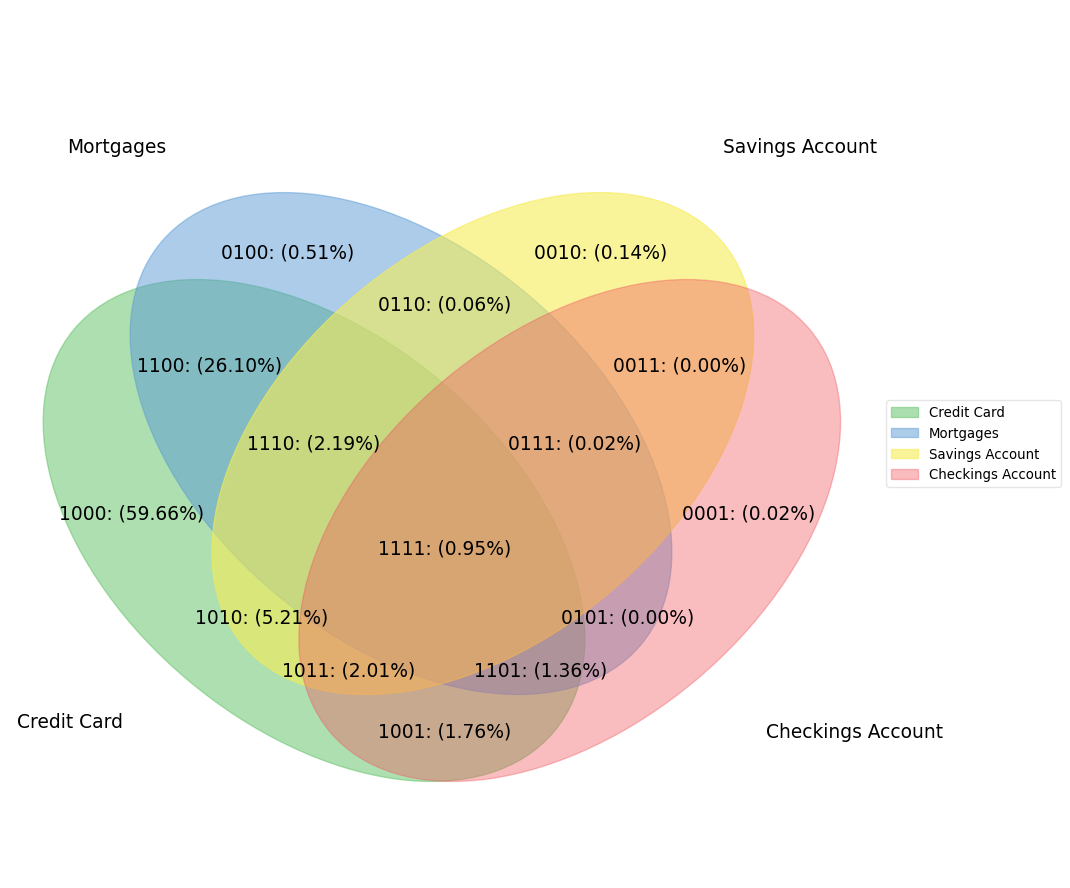

In [50]:
# To see the overlap between clients we will use the Inclusion-Exclusion Principle

# |A∪B∪C∪D|=
# |A|+|B|+|C|+|D|} all singletons
# −(|A∩B|+|A∩C|+|A∩D|+|B∩C|+|B∩D|+|C∩D|)} all pairs
# +(|A∩B∩C|+|A∩B∩D|+|A∩C∩D|+|B∩C∩D|)} all triples
# −|A∩B∩C∩D|} all quadruples

Cr = set(customer.CCAvg*raw_data.ID)
Cr.remove(0.0)
Mo = set(customer.Mortgage*raw_data.ID)
Mo.remove(0.0)
Sa = set(customer.Securities_Account*raw_data.ID)
Sa.remove(0.0)
Ch = set(customer.CD_Account*raw_data.ID)
Ch.remove(0.0)

#The intersections were calculated and stored as variables in case they are of use later in the analysis
CrMo = Cr & Mo #Computes intersection of set of Credit Card and Mortgages
CrSa = Cr & Sa
CrCh = Cr & Ch
MoSa = Mo & Sa
MoCh = Mo & Ch
SaCh = Sa & Ch
CrMoSa = Cr & Mo & Sa
CrMoCh = Cr & Mo & Ch
CrSaCh = Cr & Sa & Ch
MoSaCh = Mo & Sa & Ch
CrMoSaCh = Cr & Mo & Sa & Ch

Cr_only = Cr - CrMo - CrSa - CrCh
Mo_only = Mo - CrMo - MoSa - MoCh
Sa_only = Sa - CrSa - MoSa - SaCh
Ch_only = Ch - CrCh - MoCh - SaCh

CrMo_only = CrMo - CrMoSa - CrMoCh
CrSa_only = CrSa - CrMoSa - CrSaCh
CrCh_only = CrCh - CrSaCh - CrMoCh
MoSa_only = MoSa - CrMoSa - MoSaCh
MoCh_only = MoCh - CrMoCh - MoSaCh
SaCh_only = SaCh - CrSaCh - MoSaCh

CrMoSa_only = CrMoSa - CrMoSaCh
CrMoCh_only = CrMoCh - CrMoSaCh
CrSaCh_only = CrSaCh - CrMoSaCh
MoSaCh_only = MoSaCh - CrMoSaCh


labels = get_labels([Cr, Mo, Sa, Ch], fill=['percent', 'logic'])
fig, ax = venn4(labels, names=['Credit Card', 'Mortgages', 'Savings Account', 'Checkings Account'])
fig.show()

Using a Venn diagram, we can more clearly see the overlap between customers. We see that most of the businesses clients are Credid Card users with 59.66%. This is followed by people with Mortgages. However, very few people interact with the bank exclusively through Mortgages, but rather (with 26%) the second highest clientele group is customers with Mortgages that also have Credit Cards.

Finally, we see that similar to the histograms above, very few of the businesses customers are composed of people owning accounts.

We shall now separate these distributions between people that didn't take the offer, and more importantly for people that did.

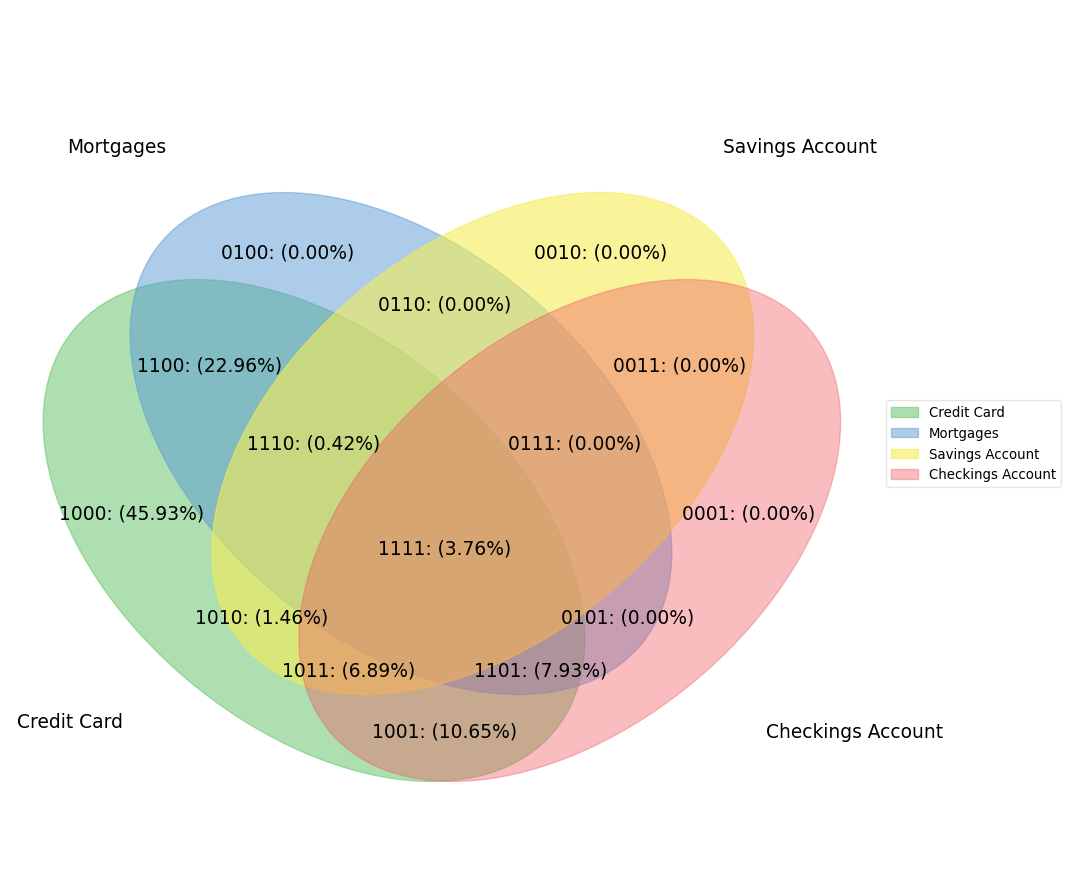

In [51]:
#First we will see the distribution for people that did take the offer

Cr = set(customer.CCAvg*raw_data.Personal_Loan*raw_data.ID)
Cr.remove(0.0)
Mo = set(customer.Mortgage*raw_data.Personal_Loan*raw_data.ID)
Mo.remove(0.0)
Sa = set(customer.Securities_Account*raw_data.Personal_Loan*raw_data.ID)
Sa.remove(0.0)
Ch = set(customer.CD_Account*raw_data.Personal_Loan*raw_data.ID)
Ch.remove(0.0)

labels = get_labels([Cr, Mo, Sa, Ch], fill=['percent', 'logic'])
fig, ax = venn4(labels, names=['Credit Card', 'Mortgages', 'Savings Account', 'Checkings Account'])
fig.show()

Very clearly, we see that the customers that took the offer are EXCLUSIVELY credit card users. This will likely play a big effect as we move forward.

We can also compare the distributions of customers between the general population and distributions for customers that accepted the offer.

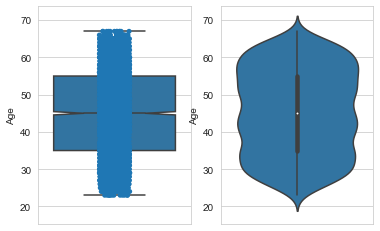

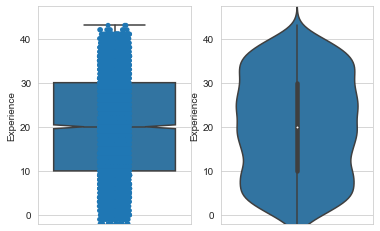

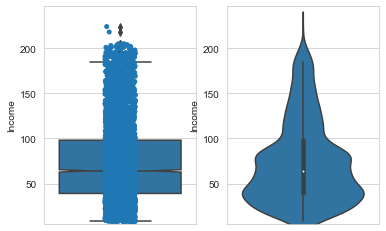

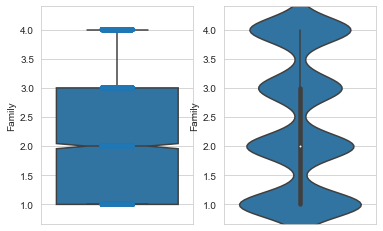

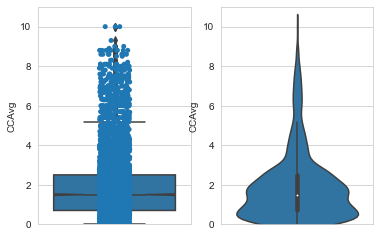

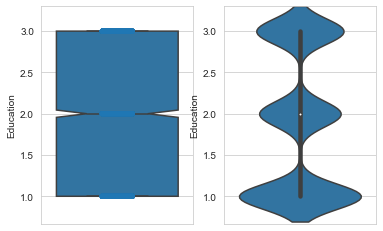

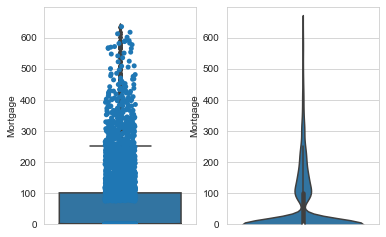

In [53]:
#Distributions for general customers

data_num = pd.DataFrame()
for n in DOI.columns:
    if np.max(DOI[n])>1:
        data_num[n] = DOI[n]

for n in data_num.columns:
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 2)
    _ylim = (min(data_num[n].values)/1.5,max(data_num[n].values)*1.1)
    plt.setp(axes, ylim=_ylim)
    sns.boxplot(y = data_num[n],notch=True,ax = axes[0])
    sns.stripplot(y = data_num[n],ax=axes[0])
    sns.violinplot(y= data_num[n],ax=axes[1])
    plt.show()

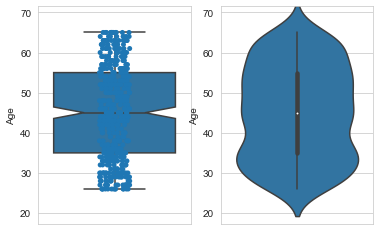

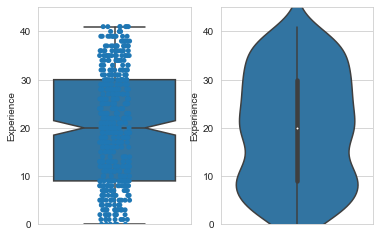

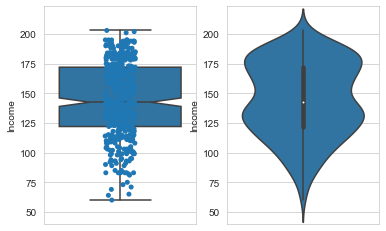

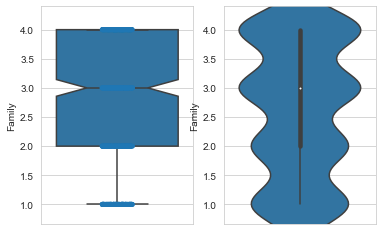

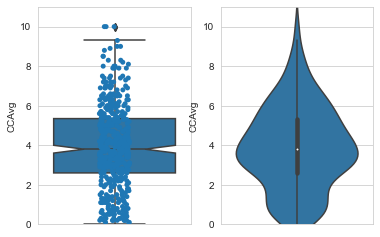

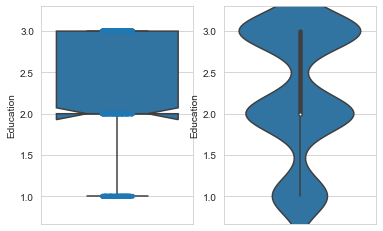

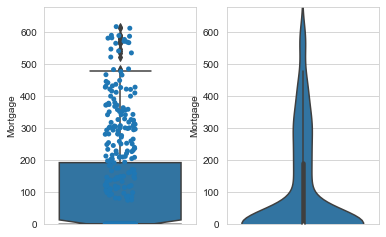

In [54]:
# Distributions for customers that accepted the offer
data_num = pd.DataFrame()
for n in DOI.columns:
    if np.max(DOI[n])>1:
        data_num[n] = DOI[n]

data_num = data_num.loc[DOI['Personal_Loan']==1]

for n in data_num.columns:
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 2)
    _ylim = (min(data_num[n].values)/1.5,max(data_num[n].values)*1.1)
    plt.setp(axes, ylim=_ylim)
    sns.boxplot(y = data_num[n],notch=True,ax = axes[0])
    sns.stripplot(y = data_num[n],ax=axes[0])
    sns.violinplot(y= data_num[n],ax=axes[1])
    plt.show()

Comparing the data between general customers versus customers who accepted the offer we see clear differences in the distribution. While age and experience seem to be fairly irrelevant, we can see that the income distribution for people who accepted the offer is substantially higher (IQR = [125 - 175]) than for the general customer (IQR = [50 - 100]). Furthemore there seems to be a slight shift towards larger families (3-4 members) in customers that accepted. In an expected fashion, customers that accepted the offer also incurred in higher credit card spending (~4k/mo) versus the general customer (~1.5k/mo).

Looking at these distributions, it would seem that the variables that will be least impactful/informative to the model will be:
- Age 
- Experience

All other variables seem to be valuable predictive variables.

Furthermore, we can observe that there is no concern regarding outliers that would affect our model.

Below we perform multivariate analysis to further visually assess relations between the variables.

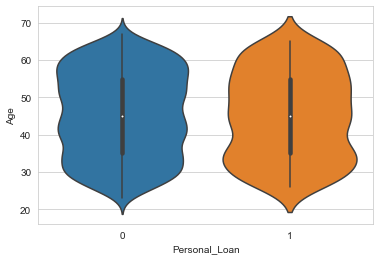

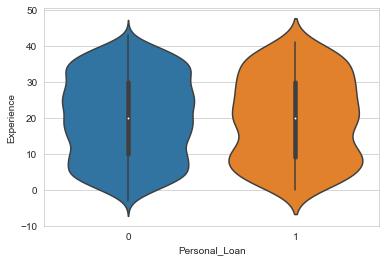

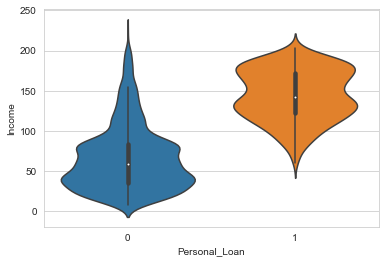

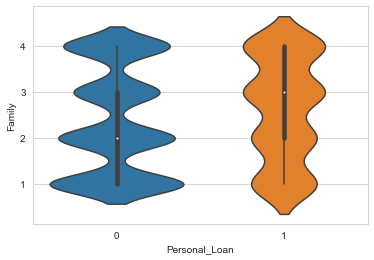

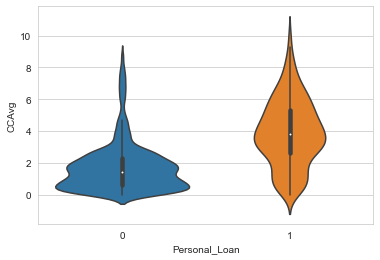

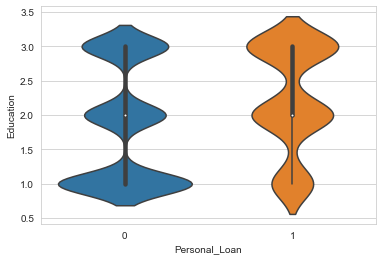

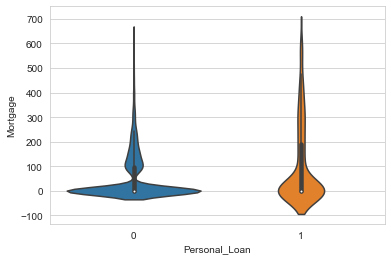

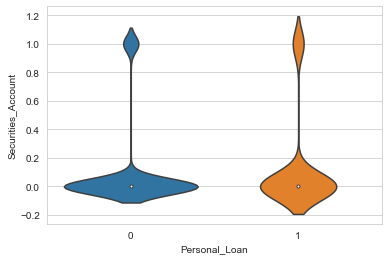

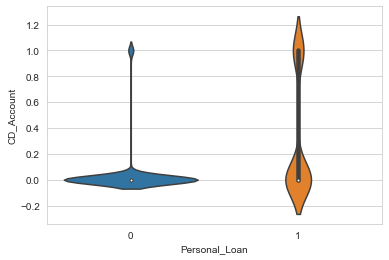

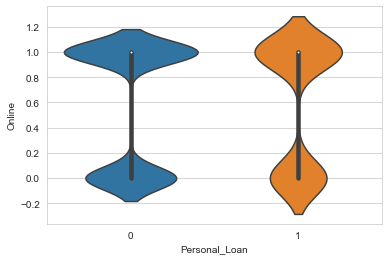

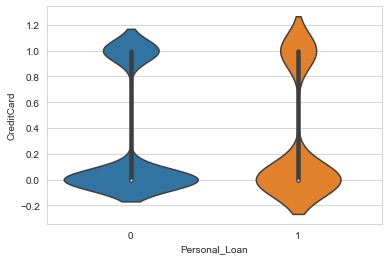

In [55]:
for t in DOI.drop(columns='Personal_Loan').columns:
    sns.violinplot(data=DOI,x='Personal_Loan',y=t)
    plt.show()